In [2]:
import pandas as pd
import seaborn as sns
import scipy.io as sio
import numpy as np


# Cubic sleep mode
&copy; Zhenxing Hu, JJA, Manaoj Aravind, 2024

## Analyse training accuracy

We analyse here the accuracy of estimated parameters depending on n_runs, n_trajectories sampled, and true parameters

Load true models

In [6]:
model_mat = np.load('./results/true_param.npy')
model_mat.shape

(4, 10, 3, 280)

In [8]:
param_names =['t0','alpha','sigma']

params = []
index_true_models = []
true_values = []

for index_param in range(model_mat.shape[2]):
    for index_param_value in range(model_mat.shape[3]): 
        params.append(param_names[index_param])
        index_true_models.append(index_param_value)
        true_values.append(model_mat[0,0,index_param,index_param_value])
        
groundtruth_df = pd.DataFrame({'param':params,
            'index_true_model': index_true_models,
            'true_value': true_values})
                
    

,param,index_true_model,true_value
0,t0,0,0.30
1,t0,1,0.30
2,t0,2,0.30
3,t0,3,0.30
4,t0,4,0.30
...,...,...,...
835,sigma,275,0.20
836,sigma,276,0.25
837,sigma,277,0.30
838,sigma,278,0.35


Load estimated values

In [15]:
est_mat = np.load('./results/est_param.npy')
est_mat.shape

(4, 10, 3, 280)

In [13]:
n_trajectories = [4,10,100,500]
param_names =['t0','alpha','sigma']

n_trajs = []
n_runs = []
params = []
index_true_models = []
estimated_values = []

for index_n_trajs in range(est_mat.shape[0]): 
    for index_n_runs in range(est_mat.shape[1]):
        for index_param in range(est_mat.shape[2]):
            for index_true_model in range(est_mat.shape[3]): 
                n_trajs.append(n_trajectories[index_n_trajs])
                n_runs.append(index_n_runs)
                params.append(param_names[index_param])
                index_true_models.append(index_true_model)
                estimated_values.append(est_mat[index_n_trajs,index_n_runs,index_param,index_true_model])

data_df = pd.DataFrame({'n_traj':n_trajs,
            'run':n_runs,
            'param':params,
            'index_true_model': index_true_models,
            'estimated_value': estimated_values})
                
                
    
data_df

    

,n_traj,run,param,index_true_model,estimated_value
0,4,0,t0,0,0.30
1,4,0,t0,1,0.40
2,4,0,t0,2,0.30
3,4,0,t0,3,0.60
4,4,0,t0,4,0.30
...,...,...,...,...,...
33595,500,9,sigma,275,0.25
33596,500,9,sigma,276,0.20
33597,500,9,sigma,277,0.35
33598,500,9,sigma,278,0.30


Merge estimated parameters with true parameters and compute error

In [58]:
data_df = data_df.merge(groundtruth_df,on=['index_true_model','param'])

In [68]:
data_df['percent_error'] = np.abs(data_df.estimated_value - data_df.true_value)/data_df.true_value
data_df['square_error'] = (data_df.estimated_value - data_df.true_value)**2

<mark> Strange pattern in data: all sequences of runs give the same results, regardless of n_traj

In [127]:
data_df[(data_df.param=='sigma')&(data_df.index_true_model==2)]

,n_traj,run,param,index_true_model,estimated_value,true_value,error,percent_error,square_error
100100,10,0,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100101,10,1,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100102,10,2,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100103,10,3,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100104,10,4,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100105,10,5,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100106,10,6,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100107,10,7,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100108,10,8,sigma,2,0.166667,0.1,0.666667,0.666667,0.004444
100109,10,9,sigma,2,0.200000,0.1,1.000000,1.000000,0.010000


<Axes: xlabel='true_value', ylabel='percent_error'>

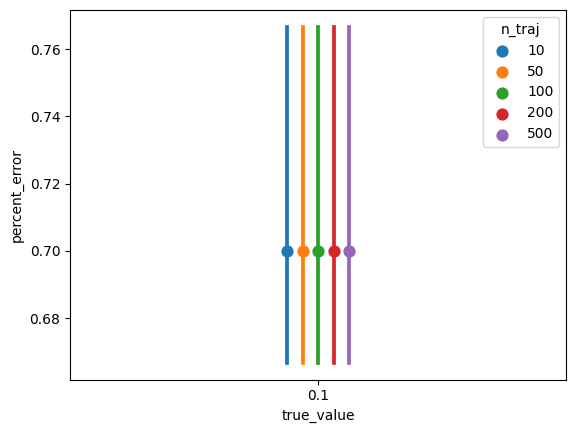

In [126]:
sns.pointplot(data=data_df[(data_df.param=='sigma')&(data_df.index_true_model==2)],
             x='true_value',hue='n_traj',
             y='percent_error', dodge=True)